In [ ]:
!pip install pyrosettacolabsetup
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()
import pyrosetta; pyrosetta.init()

PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2023.27+release.e3ce6ea9faf661ae8fa769511e2a9b8596417e58 2023-07-07T12:00:46] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r353 2023.27+release.e3ce6ea9faf e3ce6ea9faf661ae8fa769511e2a9b8596417e58 http://www.pyrosetta.org 2023-07-07T12:00:46
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-860852339 seed_offset=0 real_seed=-860852339
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-860852339 RG_type=mt19937


In [ ]:
from pyrosetta import *
from pyrosetta.toolbox import *
from pyrosetta import *
pyrosetta.init()
init()

PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2023.27+release.e3ce6ea9faf661ae8fa769511e2a9b8596417e58 2023-07-07T12:00:46] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r353 2023.27+release.e3ce6ea9faf e3ce6ea9faf661ae8fa769511e2a9b8596417e58 http://www.pyrosetta.org 2023-07-07T12:00:46
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-1877852021 seed_offset=0 real_seed=-1877852021
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-1877852021 RG_type=mt19937
PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2023.27+release.e3ce6ea9faf661ae8fa769511e2a9b

MonteCarlo with FastRelax()
========

In [ ]:
# from pyrosetta import *
# from pyrosetta.rosetta.protocols.moves import MonteCarlo
# from pyrosetta.rosetta.core.pack.task import TaskFactory
# from pyrosetta.rosetta.core.pack.task.operation import RestrictToRepacking

# init()
# pymol_mover = PyMOLMover()

# pose = pose_from_file("/content/google_drive/MyDrive/PYROSETTA_STRUCTURES/NIR_relaxed_iGLU_no_H6X.pdb")
# pymol_mover.apply(pose)

# relax = rosetta.protocols.relax.FastRelax()
# relax.set_scorefxn(create_score_function("ref2015"))
# relax.max_iter(200) check backbone minimization

# tf = TaskFactory()
# tf.push_back(RestrictToRepacking())

# nstruct = 10
# kT = 1.0 absolute temp by boltzman. 0.62
# mmc_trials = 100
# mmc_acceptance = 0.1

# for i in range(nstruct):
#     cloned_pose = pose.clone()
#     tf.create_task_and_apply_taskoperations(cloned_pose)
#     relax.apply(cloned_pose)

#     scorefxn = create_score_function("ref2015")

#     mc = MonteCarlo(cloned_pose, scorefxn, kT)
#     mc.set_autotemp(True, kT)
#     mc.set_temperature(kT)

#     for j in range(mmc_trials):
#         mc.boltzmann(cloned_pose, "low")

#     output_pdb_name = f"output_{i+1}.pdb"
#     mc.lowest_score_pose().dump_pdb(output_pdb_name)


Nstruct using Fast Relax
===============

In [ ]:
import pyrosetta
from pyrosetta import PyMOLMover
from pyrosetta.rosetta.core.pack.task import TaskFactory
from pyrosetta.rosetta.core.pack.task.operation import RestrictToRepacking
import datetime

# Get the current date
current_date = datetime.datetime.today().strftime('%Y_%m_%d')

# Initialize PyRosetta
output_folder = "/content/google_drive/MyDrive/Nstruct"

# Create a PyMOLMover to visualize the output structures
pymol_mover = PyMOLMover()

# Load the PDB structure
pose = pyrosetta.pose_from_file("/content/google_drive/MyDrive/PYROSETTA_FROM_EDU_ACCOUNT/PYROSETTA_STRUCTURES/Unrelaxed_NIR_IGLU.pdb")

# Apply the PyMOLMover to visualize the input structure
pymol_mover.apply(pose)

# Set up the FastRelax protocol
relax = pyrosetta.rosetta.protocols.relax.FastRelax()
relax.set_scorefxn(pyrosetta.create_score_function("ref2015"))
cycles = 1500

relax.max_iter(cycles)  # Adjust the number of iterations as needed

# Set up the TaskFactory to allow repacking of residues
tf = TaskFactory()
tf.push_back(RestrictToRepacking())

# Set up the number of output structures
nstruct = 100  # Number of output structures

# Perform relaxation and output the structures
for i in range(nstruct):
    # Clone the original pose
    relax_pose = pose.clone()

    # Apply the TaskFactory to the pose
    tf.create_task_and_apply_taskoperations(relax_pose)

    # Run FastRelax on the pose
    relax.apply(relax_pose)

    # Output the relaxed structure
    output_pdb_name = f"{cycles}_cycles_1_unrelaxed_structure_{current_date}{i+1}.pdb"
    output_path = os.path.join(output_folder, output_pdb_name)
    relax_pose.dump_pdb(output_path)

# Finalize PyRosetta
pyrosetta.deinit()


core.import_pose.import_pose: File '/content/google_drive/MyDrive/PYROSETTA_FROM_EDU_ACCOUNT/PYROSETTA_STRUCTURES/Unrelaxed_NIR_IGLU.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 430
core.conformation.Conformation: Found disulfide between residues 84 209
protocols.relax.RelaxScriptManager: Reading relax scripts list from database.
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.relax.RelaxScriptManager: Looking for MonomerRelax2019.txt
protocols.relax.RelaxScriptManager: ================== Reading script file: /usr/local/lib/python3.10/dist-packages/pyrosetta/database/sampling/relax_scripts/MonomerRelax2019.txt ==================
protocols.relax.RelaxScriptManager: repeat %%nrepeats%%
protocols.relax.RelaxScriptManager: coord_cst_weight 1.0
protocols.relax.RelaxScriptManager: scale:fa_rep 0.040
protocols.relax.RelaxScriptManager: repack
protocols.relax.RelaxScriptMa

Use with Repack and Redesign Feature
==========


In [ ]:
# import pyrosetta
# from pyrosetta import PyMOLMover
# from pyrosetta.rosetta.core.pack.task import TaskFactory
# from pyrosetta.rosetta.core.pack.task.operation import RestrictToRepacking, OperateOnResidueSubset
# from pyrosetta.rosetta.core.select.residue_selector import ResidueIndexSelector

# # Initialize PyRosetta
# pyrosetta.init()

# # Create a PyMOLMover to visualize the output structures
# pymol_mover = PyMOLMover()

# # Load the PDB structure
# pose = pyrosetta.pose_from_file("/content/google_drive/MyDrive/PYROSETTA_STRUCTURES/NIR_relaxed_iGLU_no_H6X.pdb")

# # Apply the PyMOLMover to visualize the input structure
# pymol_mover.apply(pose)

# # Set up the FastRelax protocol
# relax = pyrosetta.rosetta.protocols.relax.FastRelax()
# relax.set_scorefxn(pyrosetta.create_score_function("ref2015_cst"))
# relax.max_iter(300)  # Adjust the number of iterations as needed

# # Set up the TaskFactory to allow repacking and redesigning of residues
# tf = TaskFactory()

# # Create a ResidueSelector to select the residues you want to redesign
# selector = ResidueIndexSelector("1-100")  # Example: redesigning residues 1 to 100

# # Include OperateOnResidueSubset operation to allow redesigning of selected residues
# repack_design = pyrosetta.rosetta.core.pack.task.operation.RestrictToRepacking()
# repack_design.include_residue_selector(selector)
# redesign = pyrosetta.rosetta.core.pack.task.operation.DesignRestrictions()
# redesign.include_residue_selector(selector)

# # Add the operations to the TaskFactory
# tf.push_back(repack_design)
# tf.push_back(redesign)

# # Set up the number of output structures
# nstruct = 1000  # Number of output structures

# # Perform relaxation and output the structures
# for i in range(nstruct):
#     # Clone the original pose
#     relax_pose = pose.clone()

#     # Apply the TaskFactory to the pose
#     tf.create_task_and_apply_taskoperations(relax_pose)

#     # Run FastRelax on the pose
#     relax.apply(relax_pose)

#     # Output the relaxed structure
#     output_pdb_name = f"output_{i+1}.pdb"
#     relax_pose.dump_pdb(output_pdb_name)

# # Finalize PyRosetta
# pyrosetta.deinit()


Use for MoveMaps sidechain packing and backbone
=============


In [ ]:
# relax = rosetta.protocols.relax.FastRelax()
# # Modify the MoveMap
# move_map = relax.movemap()
# # Customize the MoveMap according to your requirements
# move_map.set_bb(True)  # Allow backbone torsions to move
# move_map.set_chi(True)  # Allow side-chain torsions to move


Use for RMSD and Scorefxn Analysis of Nstruct Clones
=========

In [ ]:
import pyrosetta
import os
from pyrosetta import PyMOLMover
from pyrosetta.rosetta.core.scoring import CA_rmsd

# Initialize PyRosetta
pyrosetta.init()

# Create a PyMOLMover to visualize the structures
pymol_mover = PyMOLMover()

# Define the folder path containing the structures
folder_path = "/content/google_drive/MyDrive/Nstruct"



# Set up the score function
scorefxn = pyrosetta.create_score_function("ref2015")

# Iterate over the files in the folder
scored_nstructs = []
for filename in os.listdir(folder_path):
    # Check if the file is a PDB file
    if filename.endswith(".pdb"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Load the structure from the file
        nstruct_pose = pyrosetta.pose_from_file(file_path)

        # Apply the PyMOLMover to visualize the structure
        pymol_mover.apply(nstruct_pose)

        # Score the structure using the score function
        score = scorefxn(nstruct_pose)

        # Print the filename and score
        print(f"Structure: {filename}, Score: {score}")

        # Append result to list
        scored_nstructs.append((filename, score))

# Sort the list based on the second value (score)
scored_nstructs.sort(key=lambda x: x[1])

# Retrieve the filename of the lowest scored structure
lowest_scored_filename = scored_nstructs[0][0]

# Load the lowest scored structure
lowest_scored_path = os.path.join(folder_path, lowest_scored_filename)
lowest_scored_pose = pyrosetta.pose_from_file(lowest_scored_path)

RMSD_and_score = []
for filename in os.listdir(folder_path):
    # Check if the file is a PDB file
    if filename.endswith(".pdb"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Load the structure from the file
        nstruct_pose = pyrosetta.pose_from_file(file_path)

        # Apply the PyMOLMover to visualize the structure
        pymol_mover.apply(nstruct_pose)

        score = scorefxn(nstruct_pose)

        # Score the structure using the score function
        rmsd_value = CA_rmsd(lowest_scored_pose, nstruct_pose)

        # Print the filename and score
        print(f"Structure: {filename}, Score: {score}, RMSD: {rmsd_value}" )

        RMSD_and_score.append((filename, rmsd_value, score))

print('done')




Streaming output truncated to the last 5000 lines.
core.conformation.Conformation: Found disulfide between residues 84 209
Structure: 100_cycles_3_unrelaxed_structure_34.pdb, Score: -1341.6383677278066, RMSD: 0.4998948872089386
core.import_pose.import_pose: File '/content/google_drive/MyDrive/Nstruct/100_cycles_2_unrelaxed_structure_31.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 84 209
Structure: 100_cycles_2_unrelaxed_structure_31.pdb, Score: -1341.686742746014, RMSD: 0.872073233127594
core.import_pose.import_pose: File '/content/google_drive/MyDrive/Nstruct/100_cycles_4_unrelaxed_structure_35.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 84 209
Structure: 100_cycles_4_unrelaxed_structure_35.pdb, Score: -1341.7504268293321, RMSD: 0.4548516273498535
core.import_pose.import_pose: File '/content/google_drive/MyDrive/Nstruct/100_cycles_5_unrelaxed_structu

In [ ]:
lowest_scored_pose = pyrosetta.pose_from_file(lowest_scored_path)
lowest_score = scorefxn(lowest_scored_pose)
print(lowest_score)

core.import_pose.import_pose: File '/content/google_drive/MyDrive/Nstruct/1500_cycles_4_unrelaxed_structure_2023_07_303.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 84 209
-1368.277588169243


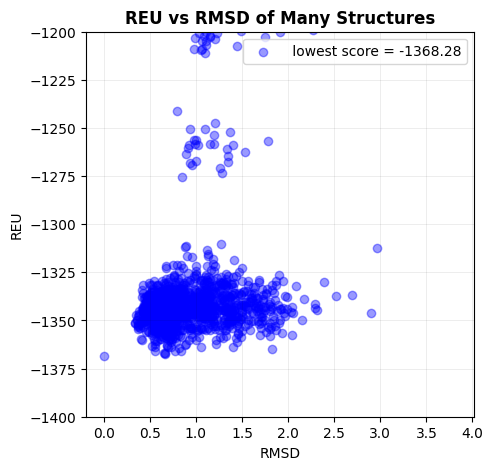

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (5,5))
RMSD = [x[1] for x in RMSD_and_score]
REU = [x[2] for x in RMSD_and_score]
ax.scatter(RMSD, REU, alpha = 0.4, c = 'blue', )
ax.grid(True, linestyle='-', linewidth=0.5, color='k', alpha=0.1, zorder=0, )
ax.set_title('REU vs RMSD of Many Structures', fontweight = 'bold')
ax.set_ylabel('REU')
ax.set_xlabel('RMSD')
# plt.xlim(250, 1500)
plt.ylim(-1400, -1200)

plt.legend([f' lowest score = {round(lowest_score,2)}'])

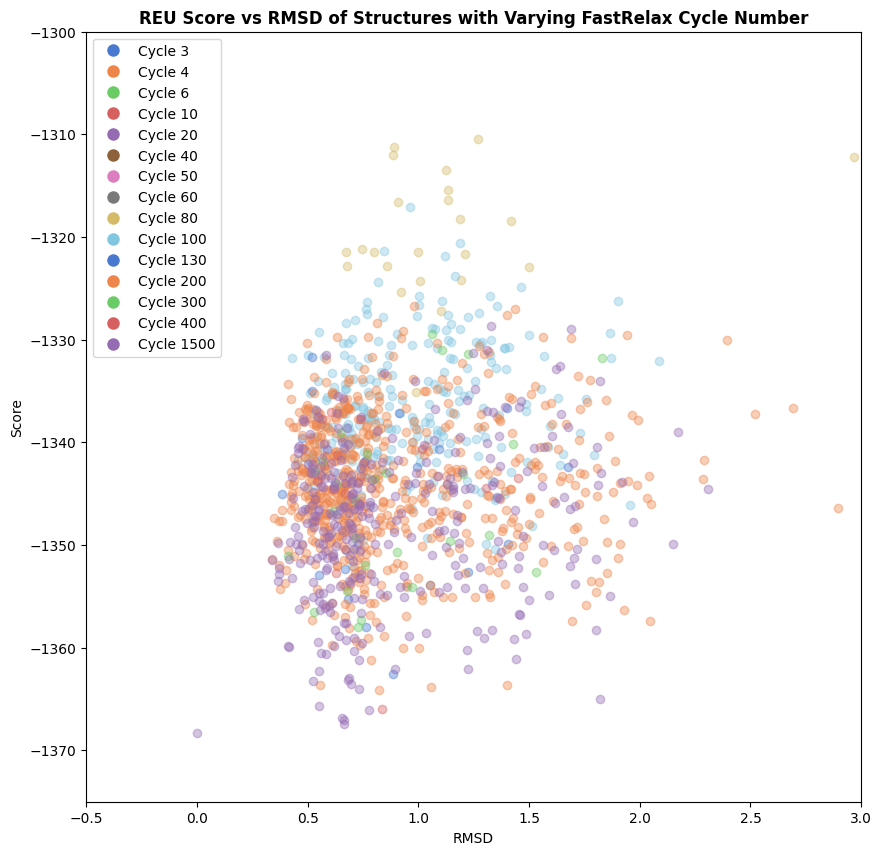

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cycles_data = {}

for filename, rmsd_value, score in RMSD_and_score:
    cycle_number = int(filename.split('_')[0])
    if cycle_number not in cycles_data:
        cycles_data[cycle_number] = []
    cycles_data[cycle_number].append((filename, rmsd_value, score))

# Sort the data based on the cycle number
sorted_cycles_data = dict(sorted(cycles_data.items()))

# Create a list of colors using the 'muted' color palette
colors = sns.color_palette('muted', len(sorted_cycles_data))

# Create a new figure for the 2D scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot for each cycle
for i, (cycle_number, cycle_data) in enumerate(sorted_cycles_data.items()):
  # if cycle_number == 200 or cycle_number == 130:


    x = [data[1] for data in cycle_data]  # RMSD values as x coordinate
    y = [data[2] for data in cycle_data]  # Score values as y coordinate
    ax.scatter(x, y, color=colors[i], alpha=0.4, label=f'Cycle {cycle_number}')

ax.set_title('REU Score vs RMSD of Structures with Varying FastRelax Cycle Number', fontweight='bold')
ax.set_xlabel('RMSD')
ax.set_ylabel('Score')

# Create custom legend with one label per cycle
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cycle {cycle_number}', markerfacecolor=colors[i], markersize=10) for i, cycle_number in enumerate(sorted_cycles_data.keys())]
ax.legend(handles=legend_elements)
# ax.grid(True, linestyle='--', linewidth=0.5, color='k', alpha=0.1, zorder=0, )
plt.xlim(-.5, 3)
plt.ylim(-1375, -1300)

plt.show()


<ipython-input-5-89d40868fa3f>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(x, y, z, color = colors[i], vmin=min(all_scores), vmax=max(all_scores), alpha=0.4, label=f'Cycle {cycle_number}')


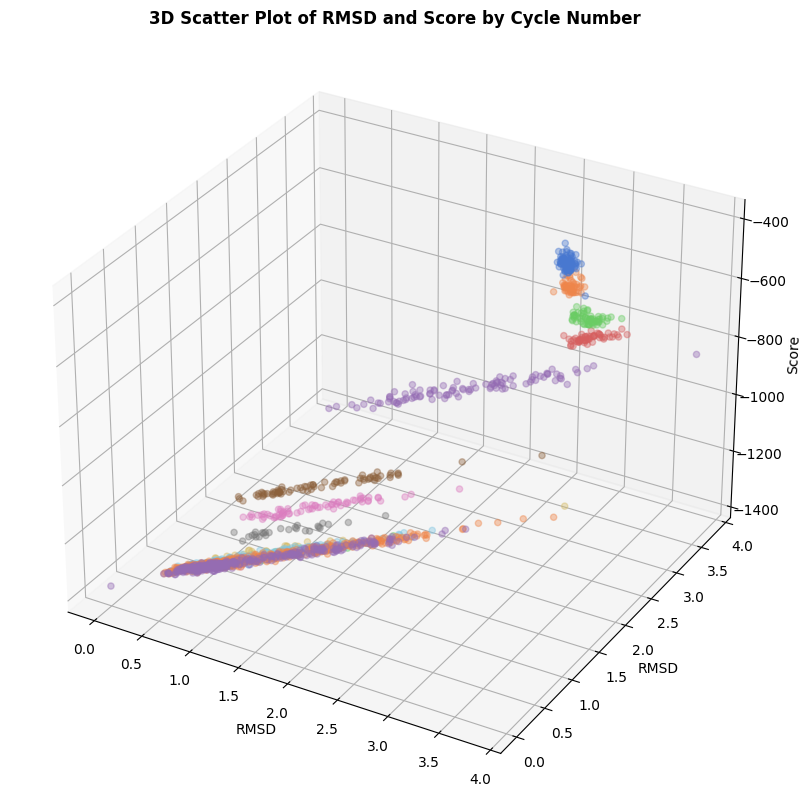

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

cycles_data = {}

for filename, rmsd_value, score in RMSD_and_score:
    cycle_number = int(filename.split('_')[0])
    if cycle_number not in cycles_data:
        cycles_data[cycle_number] = []
    cycles_data[cycle_number].append((filename, rmsd_value, score))

# Sort the data based on the cycle number
sorted_cycles_data = dict(sorted(cycles_data.items()))

# Create a list of colors using the 'muted' color palette
colors = sns.color_palette('muted', len(sorted_cycles_data))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Collect all score values for consistent color map scaling
all_scores = [data[2] for cycle_data in sorted_cycles_data.values() for data in cycle_data]

# Scatter plot for each cycle
for i, (cycle_number, cycle_data) in enumerate(sorted_cycles_data.items()):
    x = [data[1] for data in cycle_data]  # RMSD values as x coordinate
    y = [data[1] for data in cycle_data]  # RMSD values as y coordinate
    z = [data[2] for data in cycle_data]  # Score values as z coordinate
    ax.scatter(x, y, z, color = colors[i], vmin=min(all_scores), vmax=max(all_scores), alpha=0.4, label=f'Cycle {cycle_number}')

ax.set_title('3D Scatter Plot of RMSD and Score by Cycle Number', fontweight='bold')
ax.set_xlabel('RMSD')
ax.set_ylabel('RMSD')
ax.set_zlabel('Score')

# Create custom legend with one label per cycle
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cycle {cycle_number}', markerfacecolor=colors[i], markersize=10) for i, cycle_number in enumerate(sorted_cycles_data.keys())]
# ax.legend(handles=legend_elements)

Assess Ensemble's REU by Residue
=======

In [ ]:
# import os
# import pyrosetta
# import pandas as pd
# import matplotlib.pyplot as plt

# pyrosetta.init()

# pose = pyrosetta.pose_from_pdb("/content/google_drive/MyDrive/PYROSETTA_FROM_EDU_ACCOUNT/PYROSETTA_STRUCTURES/NIR_relaxed_iGLU_no_H6X.pdb")
# sfxn = pyrosetta.get_fa_scorefxn()
# sfxn.set_weight(pyrosetta.rosetta.core.scoring.pro_close, 0)

# folder_path = "/content/google_drive/MyDrive/Nstruct"
# residues = list(range(1, 430))
# terms = ['total_score']

# # Initialize a list to store the data for each structure
# all_structure_data = []

# for filename in os.listdir(folder_path):
#     if filename.endswith('pdb'):
#         file_path = os.path.join(folder_path, filename)
#         nstruct_pose = pyrosetta.pose_from_file(file_path)
#         delta_G = sfxn(nstruct_pose)

#         # Calculate the REU data for each residue in the structure
#         data = {'residue': residues}
#         for term in terms:
#             data[term] = []
#             score_type = pyrosetta.rosetta.core.scoring.score_type_from_name(term)
#             for i in residues:
#                 term_value = nstruct_pose.energies().residue_total_energies(i)[score_type]
#                 data[term].append(term_value)

#         # Append the data for this structure to the list
#         all_structure_data.append(data)

# # Create a DataFrame for each structure's data and plot it as a connected line
# for i, data in enumerate(all_structure_data):
#     df = pd.DataFrame(data)
#     plt.plot(df['residue'], df['total_score'], label=f'Structure {i+1}')

# # Add labels and legend to the plot
# plt.xlabel('Residue')
# plt.ylabel('Total Score')
# # plt.legend()
# plt.title('REU Data for Multiple Structures')
# plt.grid(True)

# # Show the plot
# plt.show()


In [ ]:
# for i, data in enumerate(all_structure_data):
#     df = pd.DataFrame(data)
#     plt.plot(df['residue'], df['total_score'], label=f'Structure {i+1}')

# # Add labels and legend to the plot
# plt.xlabel('Residue')
# plt.ylabel('Total Score')
# # plt.legend()
# plt.title('REU Data for Multiple Structures')
# plt.grid(True)
# # plt.xlim(.4, 2.5)
# # plt.ylim(-10, 20)

# # Show the plot
# plt.show()